# Cleaner notebook for compare FM project </br>

Using new coding strategies learned for organization and automation. </br>

Working from: *"C:/Users/User/msc_project/Image-processing-strategies/mask_control/projects/fm_comp_mk2"* </br>
Output demod in: *"C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/demodulated/avg_soft_tissue"* </br>
Output for metrics: *"C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/avg_soft_tissue* </br>



In [1]:
import numpy as np
import nibabel as nib
import os
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Image loading - This are FIELDMAPS in Hz
AMU_img = nib.load("C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/charles_PAM50/sub-amuVC_fmap_Hz.nii.gz")
custom6_img = nib.load("C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/fms/PAM50_comp/custom6_mb_Hz.nii.gz")
db0_030_img = nib.load("C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/testing_3_echoes/FM_tests/ROMEO_results/test10_all_sc_smooth/B0.nii")


In [4]:
# Image to np data - Original/raw data
AMU_data = AMU_img.get_fdata()
custom6_data = custom6_img.get_fdata()
db0_30_data = db0_030_img.get_fdata()

### Cropping the measured FM

In [70]:
romeo_qmask_img = nib.load("C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/testing_3_echoes/FM_tests/ROMEO_results/test10_all_sc_smooth/smooth_complete_sc_mask.nii.gz")
romeo_qmask_data = romeo_qmask_img.get_fdata()
db0_30_qmasked_data = db0_30_data*romeo_qmask_data

In [73]:
db0_30_qmasked_new_img = nib.Nifti1Image(db0_30_qmasked_data, affine = db0_030_img.affine)
nib.save(db0_30_qmasked_new_img,"C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/db0_030_qmasked_fm.nii.gz")

### Loading and apply soft tissue mask on AMU and custom6

In [4]:
# Mask loading + np.data
AMU_soft_tissue_mask_img= nib.load("C:/Users/User/msc_project/Image-processing-strategies/mask_control/projects/fm_comp_mk2/step2_soft_tissue_masks/mask_soft_tissue_AMU_VC.nii.gz")
custom6_soft_tissue_mask_img = nib.load("C:/Users/User/msc_project/Image-processing-strategies/mask_control/projects/fm_comp_mk2/step2_soft_tissue_masks/mask_soft_tissue_measured_and_simulated.nii.gz")
# ROMEO is untouched for the first trial, no mask for ROMEO
AMU_soft_tissue_mask_data = AMU_soft_tissue_mask_img.get_fdata()
custom6_soft_tissue_mask_data = custom6_soft_tissue_mask_img.get_fdata()

In [9]:
# Calculate the average with masks
AMU_soft_demod_factor = np.mean(AMU_data[AMU_soft_tissue_mask_data==1])
print(AMU_soft_demod_factor,"Hz")

-261.83327465587246 Hz


In [10]:
# Now for custom6 
custom6_soft_demod_factor = np.mean(custom6_data[custom6_soft_tissue_mask_data==1])
print(custom6_soft_demod_factor,"Hz")

-231.3995713535578 Hz


In [11]:
# Perform demodulation by average only where theres soft tissue
AMU_soft_tissue_avg = AMU_data - AMU_soft_demod_factor
custom6_soft_tissue_avg = custom6_data - custom6_soft_demod_factor

In [13]:
demod_AMU_new_img = nib.Nifti1Image(AMU_soft_tissue_avg, affine = AMU_img.affine)
demod_custom6_new_img= nib.Nifti1Image(custom6_soft_tissue_avg, affine = custom6_img.affine)

In [14]:
# Save new demoded
nib.save(demod_AMU_new_img, "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/demodulated/avg_soft_tissue/demod_soft_tissue_AMU.nii.gz")
nib.save(demod_custom6_new_img, "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/demodulated/avg_soft_tissue/demod_soft_tissue_custom6.nii.gz")

## Loading non-demodulated metrics csv for comparisons


In [5]:
vertebrae_levels_c1_t7 = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7']

In [45]:
path_to_extract_metric_no_demod_folder = "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/no_demod"

######### 
no_demod_AMU_CV_csv = os.path.join(path_to_extract_metric_no_demod_folder, "AMU_VC_extract_metrics.csv")
no_demod_df_amu_cv= pd.read_csv(AMU_CV_csv)
no_demod_AMU_CV_wa_data = no_demod_df_amu_cv['WA()']

no_demod_db0_30_csv = os.path.join(path_to_extract_metric_no_demod_folder, "db0_030_metrics.csv")
no_demod_df_db0_030 = pd.read_csv(no_demod_db0_30_csv)
no_demod_db0_030_wa_data = no_demod_df_db0_030['WA()']

no_demod_custom6_csv = os.path.join(path_to_extract_metric_no_demod_folder, "custom6_extract_metrics.csv")
no_demod_df_custom6 = pd.read_csv(no_demod_custom6_csv)
no_demod_custom6_wa_data = no_demod_df_custom6['WA()']



## Extracting metrics with SCT

In [67]:
# We need one AMU that goes from 4:14 
!sct_extract_metric -i "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/charles_PAM50/sub-amuVC_fmap_Hz.nii.gz" -f "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/charles_PAM50/spinal_cord_AMU_VC.nii.gz" -method wa -vert 4:14 -vertfile "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/charles_PAM50/eroded3_vert_labels_AMU_VC.nii.gz" -perlevel 1 -o "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/AMU_VC_4_14_extract_metrics.csv"



--
Spinal Cord Toolbox (6.2)

sct_extract_metric -i C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/charles_PAM50/sub-amuVC_fmap_Hz.nii.gz -f C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/charles_PAM50/spinal_cord_AMU_VC.nii.gz -method wa -vert 4:14 -vertfile C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/charles_PAM50/eroded3_vert_labels_AMU_VC.nii.gz -perlevel 1 -o C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/AMU_VC_4_14_extract_metrics.csv
--


Load metric image...
Estimation for label: spinal_cord_AMU_VC

Done! To view results, type:
start C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/AMU_VC_4_14_extract_met

In [15]:
# For custom 6, only replace the -i folder and indicate the demod output folder under extract_metrics
!sct_extract_metric -i "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/demodulated/avg_soft_tissue/demod_soft_tissue_custom6.nii.gz" -f "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/testing_3_echoes/label_vertebrae/custom6_mb_sc.nii.gz" -method wa -vert 4:14 -vertfile "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/testing_3_echoes/label_vertebrae/sc_labeled_c4t7.nii.gz" -o "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/avg_soft_tissue/demod_custom6_extract_metrics.csv" -perlevel 1



--
Spinal Cord Toolbox (6.2)

sct_extract_metric -i C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/demodulated/avg_soft_tissue/demod_soft_tissue_custom6.nii.gz -f C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/testing_3_echoes/label_vertebrae/custom6_mb_sc.nii.gz -method wa -vert 4:14 -vertfile C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/testing_3_echoes/label_vertebrae/sc_labeled_c4t7.nii.gz -o C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/avg_soft_tissue/demod_custom6_extract_metrics.csv -perlevel 1
--


Load metric image...
Estimation for label: custom6_mb_sc

Done! To view results, type:
start C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/avg_

In [22]:
!sct_extract_metric -i "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/demodulated/avg_soft_tissue/demod_soft_tissue_AMU.nii.gz" -f "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/charles_PAM50/spinal_cord_AMU_VC.nii.gz" -method wa -vert 1:14 -vertfile "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/charles_PAM50/eroded3_vert_labels_AMU_VC.nii.gz" -perlevel 1 -o "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/avg_soft_tissue/demod_AMU_VC_extract_metrics.csv"


--
Spinal Cord Toolbox (6.2)

sct_extract_metric -i C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/demodulated/avg_soft_tissue/demod_soft_tissue_AMU.nii.gz -f C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/charles_PAM50/spinal_cord_AMU_VC.nii.gz -method wa -vert 1:14 -vertfile C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/charles_PAM50/eroded3_vert_labels_AMU_VC.nii.gz -perlevel 1 -o C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/avg_soft_tissue/demod_AMU_VC_extract_metrics.csv
--


Load metric image...
Estimation for label: spinal_cord_AMU_VC

Done! To view results, type:
start C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extr

## Plotting metrics from CSV </br>
*Reusable code, keep in mind to always change the variable names to not overwrite!*

In [23]:
path_to_demod_extract_metric_folder = "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/avg_soft_tissue"

######### 
demod_AMU_CV_csv = os.path.join(path_to_demod_extract_metric_folder, "demod_AMU_VC_extract_metrics.csv")
demod_df_amu_cv= pd.read_csv(demod_AMU_CV_csv)
demod_AMU_CV_wa_data = demod_df_amu_cv['WA()']

#demod_db0_30_csv = os.path.join(path_to_demod_extract_metric_folder, "demod_db0_030_metrics.csv")
# Because we didn't demod db030 and we don't really want a manipullated db030 we are loading directly
no_demod_df_db0_030 = pd.read_csv("C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/no_demod/db0_030_metrics.csv")
no_demod_db0_030_wa_data = no_demod_df_db0_030['WA()']

demod_custom6_csv = os.path.join(path_to_demod_extract_metric_folder, "demod_custom6_extract_metrics.csv")
demod_df_custom6 = pd.read_csv(demod_custom6_csv)
demod_custom6_wa_data = demod_df_custom6['WA()']


In [29]:
# Vertebrae levels:
vertebrae_levels_c1_t7 = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7']
vertebrae_levels_c4_t7 = ['C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7']
vertebrae_levels_c1_t8 = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8']

### Demodulated simulations vs measured ROMEO

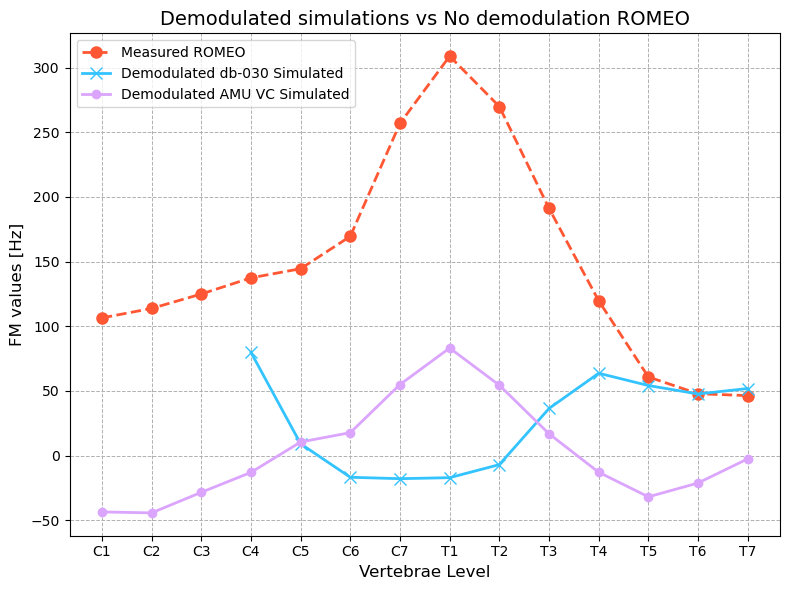

In [28]:
# Demodulated simulations with no demod GRE
# Create the plot
plt.figure(figsize=(8, 6))

# ROMEO
plt.plot(vertebrae_levels_c1_t7, no_demod_db0_030_wa_data, marker = 'o', color = '#FF5733', linestyle='--', linewidth = 2, markersize = 8, label = "Measured ROMEO")
plt.plot(vertebrae_levels_c4_t7, demod_custom6_wa_data, marker = 'x', color = '#33C3FF', linestyle='-', linewidth = 2, markersize = 8, label ='Demodulated db-030 Simulated')
plt.plot(vertebrae_levels_c1_t7, demod_AMU_CV_wa_data, marker='o', linestyle='-', color='#DBA5FD', label='Demodulated AMU VC Simulated', linewidth=2)
# Plot Simulated demodulated values
#plt.plot(vertebrae_levels_c7_t7, abs_sim_custom3, )


# Add titles and labels
plt.title('Demodulated simulations vs No demodulation ROMEO', fontsize=14)
plt.xlabel('Vertebrae Level', fontsize=12)
plt.ylabel('FM values [Hz]', fontsize=12)

plt.legend()
# Customize grid and display
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Show the plot
plt.show()

## Trying with Measured demodulated to the AVG of simulated ROI 

In [39]:
# Demodulate the measured FM using the average values from the simulated FM
demod_db0_030_with_custom6 = db0_30_data + custom6_soft_demod_factor
demod_db0_030_with_custom6_new_img = nib.Nifti1Image(demod_db0_030_with_custom6, affine = db0_030_img.affine)
nib.save(demod_db0_030_with_custom6_new_img,"C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/demodulated/avg_soft_tissue/demod_db0_030_img.nii.gz")

In [40]:
# For ROMEO FM - in vivo
!sct_extract_metric -i "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/demodulated/avg_soft_tissue/demod_db0_030_img.nii.gz" -f "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/testing_3_echoes/label_vertebrae/only_sc.nii.gz" -method wa -vert 1:14 -vertfile "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/testing_3_echoes/label_vertebrae/sct_output/only_sc_labeled.nii.gz" -o "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/avg_soft_tissue/demod_db0_030_metrics.csv" -perlevel 1


--
Spinal Cord Toolbox (6.2)

sct_extract_metric -i C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/demodulated/avg_soft_tissue/demod_db0_030_img.nii.gz -f C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/testing_3_echoes/label_vertebrae/only_sc.nii.gz -method wa -vert 1:14 -vertfile C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/testing_3_echoes/label_vertebrae/sct_output/only_sc_labeled.nii.gz -o C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/avg_soft_tissue/demod_db0_030_metrics.csv -perlevel 1
--


Load metric image...
Estimation for label: only_sc

Done! To view results, type:
start C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/avg_soft_tissue/demod

In [41]:
demod_df_db0_030 = pd.read_csv("C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/avg_soft_tissue/demod_db0_030_metrics.csv")
demod_db0_030_wa_data = demod_df_db0_030['WA()']

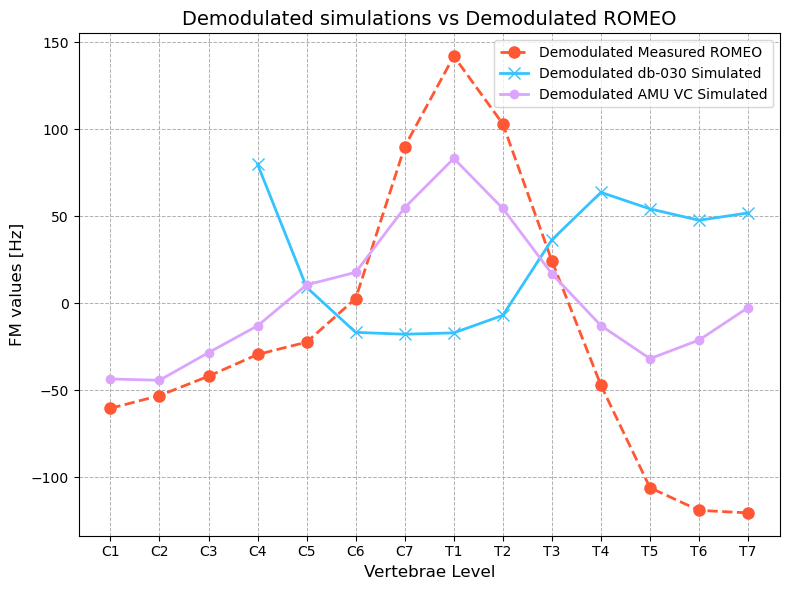

In [31]:
# Demodulated simulations with no demod GRE
# Create the plot
plt.figure(figsize=(8, 6))

# ROMEO
plt.plot(vertebrae_levels_c1_t7, demod_db0_030_wa_data, marker = 'o', color = '#FF5733', linestyle='--', linewidth = 2, markersize = 8, label = "Demodulated Measured ROMEO")
plt.plot(vertebrae_levels_c4_t7, demod_custom6_wa_data, marker = 'x', color = '#33C3FF', linestyle='-', linewidth = 2, markersize = 8, label ='Demodulated db-030 Simulated')
plt.plot(vertebrae_levels_c1_t7, demod_AMU_CV_wa_data, marker='o', linestyle='-', color='#DBA5FD', label='Demodulated AMU VC Simulated', linewidth=2)
# Plot Simulated demodulated values
#plt.plot(vertebrae_levels_c7_t7, abs_sim_custom3, )


# Add titles and labels
plt.title('Demodulated simulations vs Demodulated ROMEO', fontsize=14)
plt.xlabel('Vertebrae Level', fontsize=12)
plt.ylabel('FM values [Hz]', fontsize=12)

plt.legend()
# Customize grid and display
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Show the plot
plt.show()

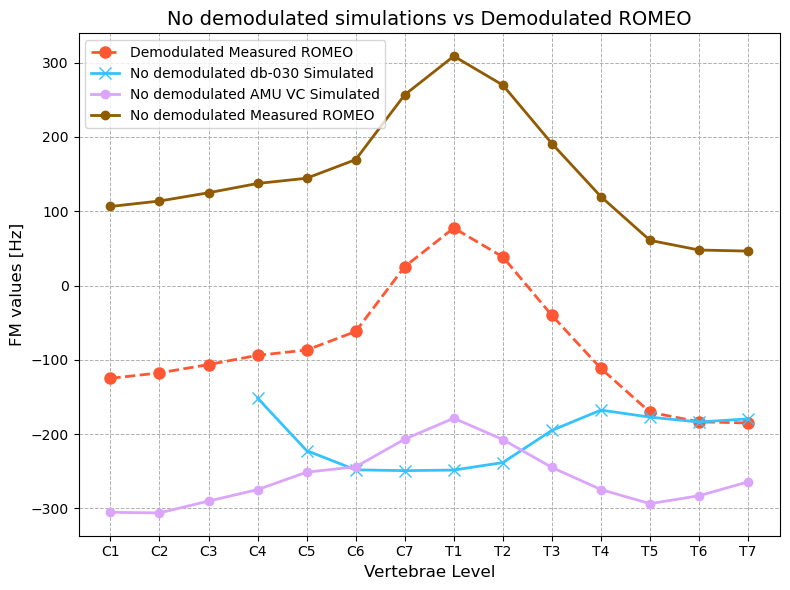

In [64]:
# Demodulated simulations with no demod GRE
# Create the plot
plt.figure(figsize=(8, 6))

# ROMEO
plt.plot(vertebrae_levels_c1_t7, demod_db0_030_wa_data, marker = 'o', color = '#FF5733', linestyle='--', linewidth = 2, markersize = 8, label = "Demodulated Measured ROMEO")
plt.plot(vertebrae_levels_c4_t7, custom6_wa_data, marker = 'x', color = '#33C3FF', linestyle='-', linewidth = 2, markersize = 8, label ='No demodulated db-030 Simulated')
plt.plot(vertebrae_levels_c1_t7, AMU_CV_wa_data, marker='o', linestyle='-', color='#DBA5FD', label='No demodulated AMU VC Simulated', linewidth=2)
plt.plot(vertebrae_levels_c1_t7, no_demod_db0_030_wa_data, marker='o', linestyle='-', color='#915B03', label='No demodulated Measured ROMEO', linewidth=2)
# Plot Simulated demodulated values
#plt.plot(vertebrae_levels_c7_t7, abs_sim_custom3, )


# Add titles and labels
plt.title('No demodulated simulations vs Demodulated ROMEO', fontsize=14)
plt.xlabel('Vertebrae Level', fontsize=12)
plt.ylabel('FM values [Hz]', fontsize=12)

plt.legend()
# Customize grid and display
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Show the plot
plt.show()

## Trial #2 using box masks and then demodulating with simulated avg on measured ROMEO

In [46]:
# Loading the masks -> converting them to np data
amu_VC_box_mask_img = nib.load("C:/Users/User/msc_project/Image-processing-strategies/mask_control/projects/fm_comp_mk2/step2_soft_tissue_masks/mask_box_corrected_soft_tissue_AMU_VC.nii.gz")
amu_VC_box_mask_data = amu_VC_box_mask_img.get_fdata()
custom6_box_mask_img = nib.load("C:/Users/User/msc_project/Image-processing-strategies/mask_control/projects/fm_comp_mk2/step2_soft_tissue_masks/mask_box_soft_tissue_custom6.nii.gz")
custom6_box_mask_data = custom6_box_mask_img.get_fdata()
db0_030_box_mask_img = nib.load("C:/Users/User/msc_project/Image-processing-strategies/mask_control/projects/fm_comp_mk2/step2_soft_tissue_masks/mask_box_soft_tissue_measured.nii.gz")
db0_030_box_mask_data = db0_030_box_mask_img.get_fdata()

In [79]:
amu_VC_box_4_to_14_mask_img = nib.load("C:/Users/User/msc_project/Image-processing-strategies/mask_control/projects/fm_comp_mk2/step2_soft_tissue_masks/mask_box_4_to_11_soft_tissue_AMU_VC.nii.gz")
amu_VC_box_4_to_14_mask_data = amu_VC_box_4_to_14_mask_img.get_fdata()

In [49]:
# Now, average of simulated on the mask
custom6_box_demod_factor = np.mean(custom6_data[custom6_box_mask_data==1])
print(custom6_box_demod_factor,'Hz')

-223.59839080204137 Hz


In [50]:
amu_VC_box_demod_factor = np.mean(AMU_data[amu_VC_box_mask_data==1])
print(amu_VC_box_demod_factor,'Hz')

-246.91116715105937 Hz


In [ ]:
amu_VC_box_demod_factor2 = np.mean(AMU_data[amu_VC_box_4_to_14_mask_data==1])
print(amu_VC_box_demod_factor2)

-271.4370985299364


In [ ]:
# db0_030_demod_custom6_box_avg 
# Anywhere where the mask is 1 we want to demodulate with custom6_box_demod_factor

#db0_30_data[db0_030_box_mask_data==1]

#db0_030_demod_custom6_box_avg = db0_30_data - np.where(db0_30_data[db0_030_box_mask_data==1])



In [55]:
db0_030_dimensions = np.array(db0_30_data.shape)
db0_030_dimensions

array([144, 144,  20])

In [58]:
db0_030_demod_custom6_box_avg = np.zeros(db0_030_dimensions)

for i in range(db0_030_dimensions[0]):
    for j in range(db0_030_dimensions[1]):
        for k in range(db0_030_dimensions[2]):

            mask_pixel = db0_030_box_mask_data[i,j,k]

            if mask_pixel == 1:
                db0_030_demod_custom6_box_avg[i,j,k] = db0_30_data[i,j,k] + custom6_box_demod_factor # Add because demod factor is negative already
            else:
                db0_030_demod_custom6_box_avg[i,j,k] = db0_30_data[i,j,k]


# This basically checks that the substraction is done ONLY where theres soft tissue

In [59]:
db0_030_demod_custom6_box_avg_new_img = nib.Nifti1Image(db0_030_demod_custom6_box_avg, affine = db0_030_img.affine)
nib.save(db0_030_demod_custom6_box_avg_new_img,"C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/demodulated/box_mask/demod_db0_030_img.nii.gz")

In [85]:
db0_030_demod_amu_VC_box_avg = np.zeros(db0_030_dimensions)

for i in range(db0_030_dimensions[0]):
    for j in range(db0_030_dimensions[1]):
        for k in range(db0_030_dimensions[2]):

            mask_pixel = romeo_qmask_data[i,j,k]

            if mask_pixel == 1:
                db0_030_demod_amu_VC_box_avg[i,j,k] = db0_30_data[i,j,k] + amu_VC_box_demod_factor2 # Add because demod factor is negative already
            else:
                db0_030_demod_amu_VC_box_avg[i,j,k] = 0



In [86]:
db0_030_demod_amu_VC_box_new_img = nib.Nifti1Image(db0_030_demod_amu_VC_box_avg, affine = db0_030_img.affine)
nib.save(db0_030_demod_amu_VC_box_new_img,"C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/demodulated/box_mask/demod_db0_030_AMU_img.nii.gz")

In [ ]:
# For ROMEO FM - in vivo
!sct_extract_metric -i "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/demodulated/avg_soft_tissue/demod_db0_030_img.nii.gz" -f "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/testing_3_echoes/label_vertebrae/only_sc.nii.gz" -method wa -vert 1:14 -vertfile "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/testing_3_echoes/label_vertebrae/sct_output/only_sc_labeled.nii.gz" -o "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/avg_soft_tissue/demod_db0_030_metrics.csv" -perlevel 1


--
Spinal Cord Toolbox (6.2)

sct_extract_metric -i C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/demodulated/avg_soft_tissue/demod_db0_030_img.nii.gz -f C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/testing_3_echoes/label_vertebrae/only_sc.nii.gz -method wa -vert 1:14 -vertfile C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/testing_3_echoes/label_vertebrae/sct_output/only_sc_labeled.nii.gz -o C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/avg_soft_tissue/demod_db0_030_metrics.csv -perlevel 1
--


Load metric image...
Estimation for label: only_sc

Done! To view results, type:
start C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/avg_soft_tissue/demod

In [116]:
# Demodulating AMU
demoded_AMU_to_zero = AMU_data - amu_VC_box_demod_factor2

In [117]:
# New image and saving
demoded_AMU_to_zero_new_img = nib.Nifti1Image(demoded_AMU_to_zero, affine = AMU_img.affine)
nib.save(demoded_AMU_to_zero_new_img,"C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/demodulated/box_mask/demod_AMU_zero_img.nii.gz")

In [118]:
# FOR AMU demodulated
!sct_extract_metric -i "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/demodulated/box_mask/demod_AMU_zero_img.nii.gz" -f "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/charles_PAM50/spinal_cord_AMU_VC.nii.gz" -method wa -vert 4:14 -vertfile "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/charles_PAM50/eroded3_vert_labels_AMU_VC.nii.gz" -perlevel 1 -o "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/demoded_AMU/demod_AMU_VC_extract_metrics.csv"


--
Spinal Cord Toolbox (6.2)

sct_extract_metric -i C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/demodulated/box_mask/demod_AMU_zero_img.nii.gz -f C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/charles_PAM50/spinal_cord_AMU_VC.nii.gz -method wa -vert 4:14 -vertfile C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/charles_PAM50/eroded3_vert_labels_AMU_VC.nii.gz -perlevel 1 -o C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/demoded_AMU/demod_AMU_VC_extract_metrics.csv
--


Load metric image...
Estimation for label: spinal_cord_AMU_VC

Done! To view results, type:
start C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/de

In [108]:
# For ROMEO FM - in vivo TEST # 2
!sct_extract_metric -i "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/demodulated/box_mask/demod_db0_030_AMU_img.nii.gz" -f "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/testing_3_echoes/label_vertebrae/only_sc.nii.gz" -method wa -vert 4:14 -vertfile "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/testing_3_echoes/label_vertebrae/sct_output/only_sc_labeled.nii.gz" -o "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/demoded_amu/demod_db0_030_metrics.csv" -perlevel 1


--
Spinal Cord Toolbox (6.2)

sct_extract_metric -i C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/demodulated/box_mask/demod_db0_030_AMU_img.nii.gz -f C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/testing_3_echoes/label_vertebrae/only_sc.nii.gz -method wa -vert 4:14 -vertfile C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/testing_3_echoes/label_vertebrae/sct_output/only_sc_labeled.nii.gz -o C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/demoded_amu/demod_db0_030_metrics.csv -perlevel 1
--


Load metric image...
Estimation for label: only_sc

Done! To view results, type:
start C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/demoded_amu/demod_db0_030_me

In [60]:
# For ROMEO FM - in vivo - new demodulated
!sct_extract_metric -i "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/demodulated/box_mask/demod_db0_030_img.nii.gz" -f "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/testing_3_echoes/label_vertebrae/only_sc.nii.gz" -method wa -vert 4:14 -vertfile "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/testing_3_echoes/label_vertebrae/sct_output/only_sc_labeled.nii.gz" -o "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/box_mask/demod_db0_030_metrics.csv" -perlevel 1


--
Spinal Cord Toolbox (6.2)

sct_extract_metric -i C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/demodulated/box_mask/demod_db0_030_img.nii.gz -f C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/testing_3_echoes/label_vertebrae/only_sc.nii.gz -method wa -vert 4:14 -vertfile C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/testing_3_echoes/label_vertebrae/sct_output/only_sc_labeled.nii.gz -o C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/box_mask/demod_db0_030_metrics.csv -perlevel 1
--


Load metric image...
Estimation for label: only_sc

Done! To view results, type:
start C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/box_mask/demod_db0_030_metrics.csv


In [68]:
# New extraction of values for AMU from 4:14
amu_VC_csv_4_14 = pd.read_csv("C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/AMU_VC_4_14_extract_metrics.csv")
amu_VC_wa_data_4_14 = amu_VC_csv_4_14['WA()']

In [61]:
demod_df_box_mask_db0_030 = pd.read_csv("C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/box_mask/demod_db0_030_metrics.csv")
demod_box_mask_db0_030_wa_data = demod_df_box_mask_db0_030['WA()']

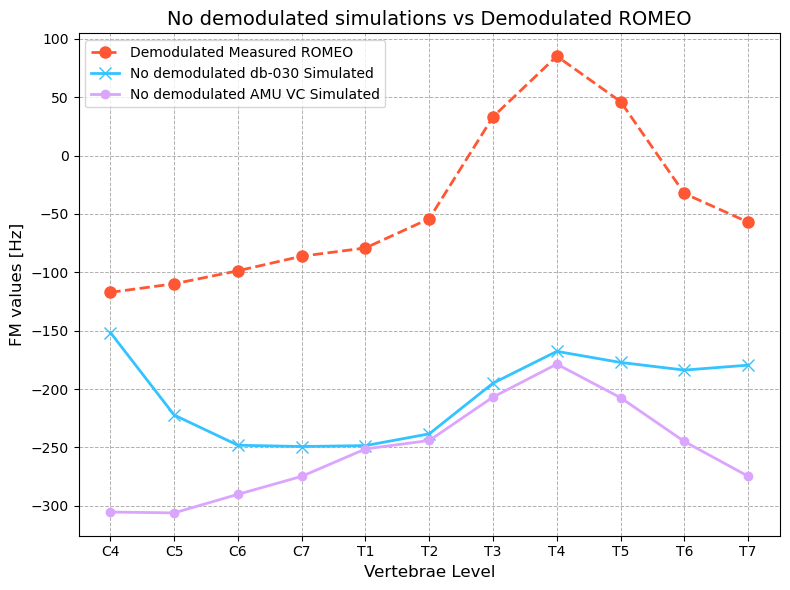

In [69]:
# Demodulated simulations with no demod GRE
# Create the plot
plt.figure(figsize=(8, 6))

# ROMEO
#plt.plot(vertebrae_levels_c1_t7, no_demod_db0_030_wa_data, marker='o', linestyle='-', color='#DBA5FD', label='No demodulated Measured ROMEO', linewidth=2)
plt.plot(vertebrae_levels_c4_t7, demod_box_mask_db0_030_wa_data, marker = 'o', color = '#FF5733', linestyle='--', linewidth = 2, markersize = 8, label = "Demodulated Measured ROMEO")
plt.plot(vertebrae_levels_c4_t7, custom6_wa_data, marker = 'x', color = '#33C3FF', linestyle='-', linewidth = 2, markersize = 8, label ='No demodulated db-030 Simulated')
plt.plot(vertebrae_levels_c4_t7, amu_VC_wa_data_4_14, marker='o', linestyle='-', color='#DBA5FD', label='No demodulated AMU VC Simulated', linewidth=2)

# Plot Simulated demodulated values
#plt.plot(vertebrae_levels_c7_t7, abs_sim_custom3, )


# Add titles and labels
plt.title('No demodulated simulations vs Demodulated ROMEO', fontsize=14)
plt.xlabel('Vertebrae Level', fontsize=12)
plt.ylabel('FM values [Hz]', fontsize=12)

plt.legend()
# Customize grid and display
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Show the plot
plt.show()

In [121]:
demod_df_db0_030_AMU_VC = pd.read_csv("C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/demoded_amu/demod_db0_030_metrics.csv")
demod_df_db0_030_AMU_VC_wa_data = demod_df_db0_030_AMU_VC['WA()']

In [124]:
demod_ZERO_amu_VC_csv = pd.read_csv("C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/demoded_amu/demod_AMU_VC_extract_metrics.csv")
demod_ZERO_amu_VC_wa_data_4_14 = demod_ZERO_amu_VC_csv["WA()"]

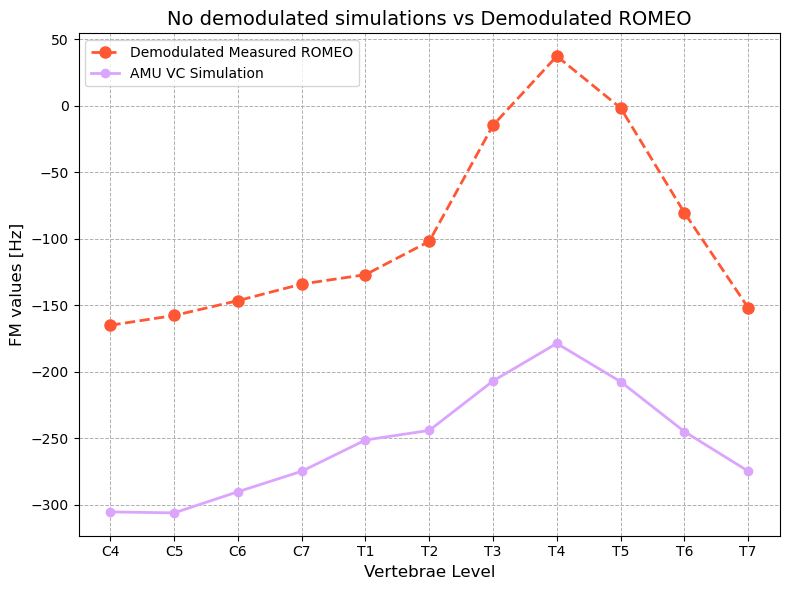

In [126]:
# Demodulated simulations with no demod GRE
# Create the plot
plt.figure(figsize=(8, 6))

# ROMEO
#plt.plot(vertebrae_levels_c1_t7, no_demod_db0_030_wa_data, marker='o', linestyle='-', color='#DBA5FD', label='No demodulated Measured ROMEO', linewidth=2)
plt.plot(vertebrae_levels_c4_t7, demod_df_db0_030_AMU_VC_wa_data, marker = 'o', color = '#FF5733', linestyle='--', linewidth = 2, markersize = 8, label = "Demodulated Measured ROMEO")
#plt.plot(vertebrae_levels_c4_t7, custom6_wa_data, marker = 'x', color = '#33C3FF', linestyle='-', linewidth = 2, markersize = 8, label ='No demodulated db-030 Simulated')
plt.plot(vertebrae_levels_c4_t7, amu_VC_wa_data_4_14, marker='o', linestyle='-', color='#DBA5FD', label='AMU VC Simulation', linewidth=2)
#plt.plot(vertebrae_levels_c4_t7, demod_ZERO_amu_VC_wa_data_4_14, marker='o', linestyle='-', color='#33C3FF', label=' AMU VC avg = 0 ', linewidth=2)
# Plot Simulated demodulated values
#plt.plot(vertebrae_levels_c7_t7, abs_sim_custom3, )


# Add titles and labels
plt.title('No demodulated simulations vs Demodulated ROMEO', fontsize=14)
plt.xlabel('Vertebrae Level', fontsize=12)
plt.ylabel('FM values [Hz]', fontsize=12)

plt.legend()
# Customize grid and display
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Show the plot
plt.show()

## Test #3 demodulating with corresponding average values </br>
In this test, every image is substracted its average from reliable sources (soft tissues). </br>
Final plot has plots were each FM is demodulated to its own average. </br>

Creating a new demoded should be named as follows: </br>
demod_NAME_img.nii.gz   </br>
Extracting metrics should be named as follows, take out demod if its not demoded: </br>
demod_extract_metrics_NAME.csv   </br>

*The name of the file will be the same but the difference is that everything is saved in different folders with appropriate names regarding the test*

### Working with measured FM - ROMEO </br>
File description: </br>
* romeo measured, db0_030 fm already masked with quality mask (to take out noise from the image) </br>
* mask, soft tissue mask from C4 to T7 </br>

</br>
Output folder for new demoded on this test: </br>
"C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/demodulated/avg_zero/"          </br>

Output folder for new metric extraction on this test: </br>
"C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/avg_zero/"          </br>

In [8]:
romeo_measured_img = nib.load("C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/db0_030_qmasked_fm.nii.gz")
romeo_measured_data = romeo_measured_img.get_fdata()
mask_romeo_measured_soft_tissue_img = nib.load("C:/Users/User/msc_project/Image-processing-strategies/mask_control/projects/fm_comp_mk2/step2_soft_tissue_masks/mask_box_soft_tissue_measured.nii.gz")
mask_romeo_measured_soft_tissue_data = mask_romeo_measured_soft_tissue_img.get_fdata()

In [9]:
# Finding the avg values inside the mask
demod_factor_romeo_measured = np.mean(romeo_measured_data[mask_romeo_measured_soft_tissue_data == 1])
print(demod_factor_romeo_measured,'Hz')

178.28145509826388 Hz


In [130]:
# Demodulating 
demoded_romeo_measured_data = romeo_measured_data - demod_factor_romeo_measured

In [133]:
# Verifying that in the mask the average is basically 0
np.mean(demoded_romeo_measured_data[mask_romeo_measured_soft_tissue_data==1])

np.float64(-1.7776045476704047e-14)

In [135]:
# Now save it
demoded_romeo_measured_img = nib.Nifti1Image(demoded_romeo_measured_data, affine = romeo_measured_img.affine)

nib.save(demoded_romeo_measured_img, "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/demodulated/avg_zero/demod_romeo_measured_img.nii.gz")

###  Working with simulated FM AMU_VC </br>

File description: </br>
* amu_vc, FM in Hz  </br>
* mask, soft tissue mask from C4 to T7 </br>

</br>
Output folder for new demoded on this test: </br>
"C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/demodulated/avg_zero/"          </br>

Output folder for new metric extraction on this test: </br>
"C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/avg_zero/"          </br>

In [10]:
# Simulated Hz should already be in the environment
# Just need to load the special mask that covers only c4:T7
mask_c4_c7_amu_VC_img = nib.load("C:/Users/User/msc_project/Image-processing-strategies/mask_control/projects/fm_comp_mk2/step2_soft_tissue_masks/mask_box_4_to_11_soft_tissue_AMU_VC.nii.gz")
mask_c4_c7_amu_VC_data = mask_c4_c7_amu_VC_img.get_fdata()

In [11]:
# Calculate average in the mask
demod_factor_c4t7_amu_VC = np.mean(AMU_data[mask_c4_c7_amu_VC_data==1])
print(demod_factor_c4t7_amu_VC,'Hz')

-271.4370985299364 Hz


In [12]:
# Demodulating
demoded_c4t7_amu_VC_data = AMU_data - demod_factor_c4t7_amu_VC

In [13]:
# Verifying that in the mask the avg is basically 0
np.mean(demoded_c4t7_amu_VC_data[mask_c4_c7_amu_VC_data==1])

np.float64(-3.017852448836883e-14)

In [14]:
demoded_c4t7_amu_VC_img = nib.Nifti1Image(demoded_c4t7_amu_VC_data, affine = AMU_img.affine)
nib.save(demoded_c4t7_amu_VC_img, "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/demodulated/avg_zero/demod_c4t7_amu_VC_img.nii.gz" )

### Extract metrics </br>
Using sct_extract_metrics


In [16]:
# For AMU VC from 4 to 14
!sct_extract_metric -i "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/demodulated/avg_zero/demod_c4t7_amu_VC_img.nii.gz" -f "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/charles_PAM50/spinal_cord_AMU_VC.nii.gz" -method wa -vert 4:14 -vertfile "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/charles_PAM50/eroded3_vert_labels_AMU_VC.nii.gz" -perlevel 1 -o "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/avg_zero/demoded_4_14_AMU_VC_extract_metrics.csv"


--
Spinal Cord Toolbox (6.2)

sct_extract_metric -i C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/demodulated/avg_zero/demod_c4t7_amu_VC_img.nii.gz -f C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/charles_PAM50/spinal_cord_AMU_VC.nii.gz -method wa -vert 4:14 -vertfile C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/charles_PAM50/eroded3_vert_labels_AMU_VC.nii.gz -perlevel 1 -o C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/avg_zero/demoded_4_14_AMU_VC_extract_metrics.csv
--


Load metric image...
Estimation for label: spinal_cord_AMU_VC

Done! To view results, type:
start C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_met

In [17]:
# For AMU VC from 4 to 15
!sct_extract_metric -i "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/demodulated/avg_zero/demod_c4t7_amu_VC_img.nii.gz" -f "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/charles_PAM50/spinal_cord_AMU_VC.nii.gz" -method wa -vert 4:15 -vertfile "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/charles_PAM50/eroded3_vert_labels_AMU_VC.nii.gz" -perlevel 1 -o "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/avg_zero/demoded_4_15_AMU_VC_extract_metrics.csv"


--
Spinal Cord Toolbox (6.2)

sct_extract_metric -i C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/demodulated/avg_zero/demod_c4t7_amu_VC_img.nii.gz -f C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/charles_PAM50/spinal_cord_AMU_VC.nii.gz -method wa -vert 4:15 -vertfile C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/charles_PAM50/eroded3_vert_labels_AMU_VC.nii.gz -perlevel 1 -o C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/avg_zero/demoded_4_15_AMU_VC_extract_metrics.csv
--


Load metric image...
Estimation for label: spinal_cord_AMU_VC

Done! To view results, type:
start C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_met

In [33]:
# Extract metrics for demoded romeo
!sct_extract_metric -i "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/demodulated/avg_zero/demod_romeo_measured_img.nii.gz"  -f "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/testing_3_echoes/label_vertebrae/only_sc.nii.gz" -method wa -vert 4:14 -vertfile "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/testing_3_echoes/label_vertebrae/sct_output/only_sc_labeled.nii.gz" -o "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/avg_zero/demoded_4_14_measured_db0_030_metrics.csv" -perlevel 1


--
Spinal Cord Toolbox (6.2)

sct_extract_metric -i C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/demodulated/avg_zero/demod_romeo_measured_img.nii.gz -f C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/testing_3_echoes/label_vertebrae/only_sc.nii.gz -method wa -vert 4:14 -vertfile C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/testing_3_echoes/label_vertebrae/sct_output/only_sc_labeled.nii.gz -o C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/avg_zero/demoded_4_14_measured_db0_030_metrics.csv -perlevel 1
--


Load metric image...
Estimation for label: only_sc

Done! To view results, type:
start C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/avg_zero/dem

### Importing csv

In [34]:
path_to_avg_zero_demod_folder = "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/demodulated/avg_zero"
path_to_avg_zero_metrics_folder = "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/avg_zero"

In [35]:
# Load csv
avg_zero_demoded_amu_VC_simulated_csv = os.path.join(path_to_avg_zero_metrics_folder,"demoded_4_14_AMU_VC_extract_metrics.csv")
avg_zero_measured_csv = os.path.join(path_to_avg_zero_metrics_folder, "demoded_4_14_measured_db0_030_metrics.csv")

In [36]:
# Extract WA from pandas data frames
avg_zero_demoded_amu_VC_df = pd.read_csv(avg_zero_demoded_amu_VC_simulated_csv)
avg_zero_demoded_measured_df = pd.read_csv(avg_zero_measured_csv)

avg_zero_demoded_amu_VC_wa_data = avg_zero_demoded_amu_VC_df['WA()']
avg_zero_demoded_measured_wa_data = avg_zero_demoded_measured_df['WA()']


11

### Plotting


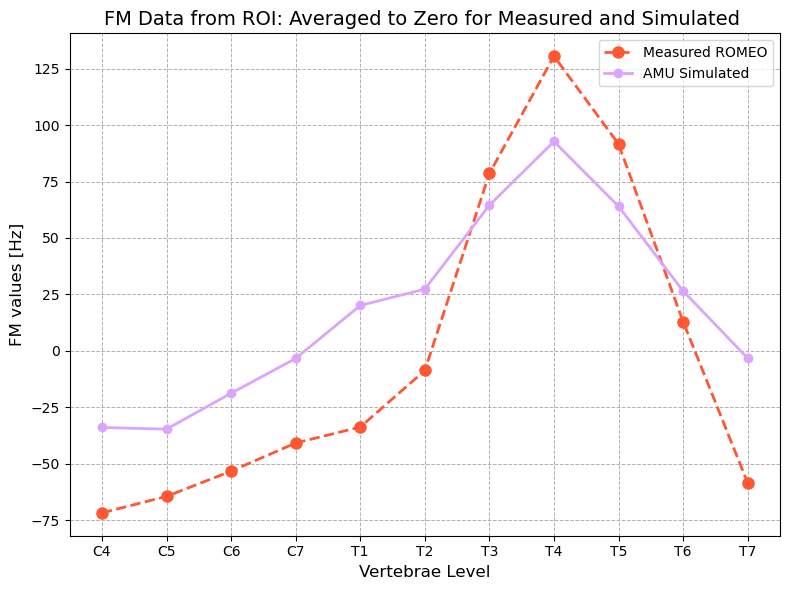

In [41]:
# Both averaged to zero
plt.figure(figsize=(8, 6))

# ROMEO
plt.plot(vertebrae_levels_c4_t7, avg_zero_demoded_measured_wa_data, marker = 'o', color = '#FF5733', linestyle='--', linewidth = 2, markersize = 8, label = "Measured ROMEO")
#plt.plot(vertebrae_levels_c4_t7, custom6_wa_data, marker = 'x', color = '#33C3FF', linestyle='-', linewidth = 2, markersize = 8, label ='Simulated GRE FOV')
plt.plot(vertebrae_levels_c4_t7, avg_zero_demoded_amu_VC_wa_data, marker='o', linestyle='-', color='#DBA5FD', label='AMU Simulated', linewidth=2)
# Plot Simulated demodulated values
#plt.plot(vertebrae_levels_c7_t7, abs_sim_custom3, )


# Add titles and labels
plt.title('FM Data from ROI: Averaged to Zero for Measured and Simulated ', fontsize=14)
plt.xlabel('Vertebrae Level', fontsize=12)
plt.ylabel('FM values [Hz]', fontsize=12)

plt.legend()
# Customize grid and display
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Show the plot
plt.show()